### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
#           'India': 'Blue', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
#           'Iran': 'brown', 
          'China': 'red', 
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-12,258317,3331346,583772,428034,219590,127901,123544,112410,107280,85451,4846
2021-05-13,262317,3344481,584574,430417,219901,127912,123745,112795,107411,85853,4846
2021-05-14,266207,3357610,585232,432628,220159,127930,123927,113182,107584,86030,4846
2021-05-15,270284,3369259,585708,434715,220384,127937,124063,113541,107696,86100,4846
2021-05-16,274390,3379349,585970,435751,220437,127941,124156,113927,107777,86166,4846


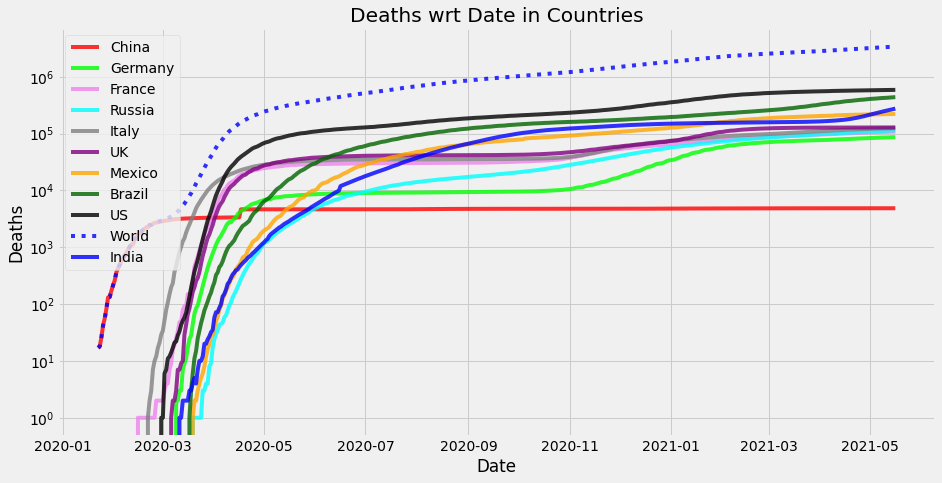

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-12,362727,760099,35878,76692,3090,2296,7848,8096,21498,6590,11
2021-05-13,343144,725275,38087,74592,3632,2663,8082,8259,19461,13631,10
2021-05-14,326098,718060,42298,85536,2880,2198,7562,9338,7043,10377,15
2021-05-15,311170,627518,28813,67009,2695,2060,6652,8667,15685,7370,21
2021-05-16,281386,548206,16864,40709,1233,1926,5748,8426,13948,7067,29


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-12,324161,753610,47661,61148,2838,2472,11294,8387,22790,15433,18
2021-05-13,325426,751721,47023,62044,2891,2485,11080,8379,22568,15313,18
2021-05-14,325471,749477,46708,63610,2890,2465,10846,8442,21533,14984,17
2021-05-15,324518,741346,45515,63837,2877,2438,10566,8457,21143,14476,18
2021-05-16,321642,728470,43605,62295,2768,2404,10245,8455,20663,13982,18


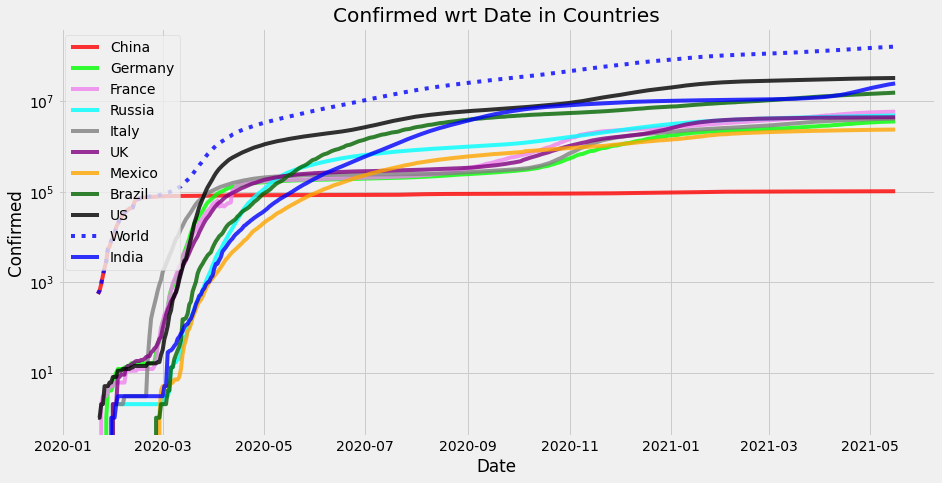

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-12,4120,13934,848,2494,267,11,262,347,184,66,0
2021-05-13,4000,13135,802,2383,311,11,201,385,131,402,0
2021-05-14,3890,13129,658,2211,258,18,182,387,173,177,0
2021-05-15,4077,11649,476,2087,225,7,136,359,112,70,0
2021-05-16,4106,10090,262,1036,53,4,93,386,81,66,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-12,3680.86,12796.35,649.52,2127.19,260.48,13.28,248.54,346.63,234.06,199.23,0.04
2021-05-13,3720.75,12838.68,668.58,2159.17,266.79,12.99,242.59,351.43,221.18,224.58,0.03
2021-05-14,3741.91,12874.97,667.26,2165.64,265.69,13.62,235.02,355.88,215.16,218.63,0.03
2021-05-15,3783.79,12721.72,643.35,2155.81,260.61,12.79,222.64,356.27,202.26,200.05,0.03
2021-05-16,3824.07,12392.76,595.68,2015.84,234.66,11.69,206.44,359.98,187.11,183.29,0.02


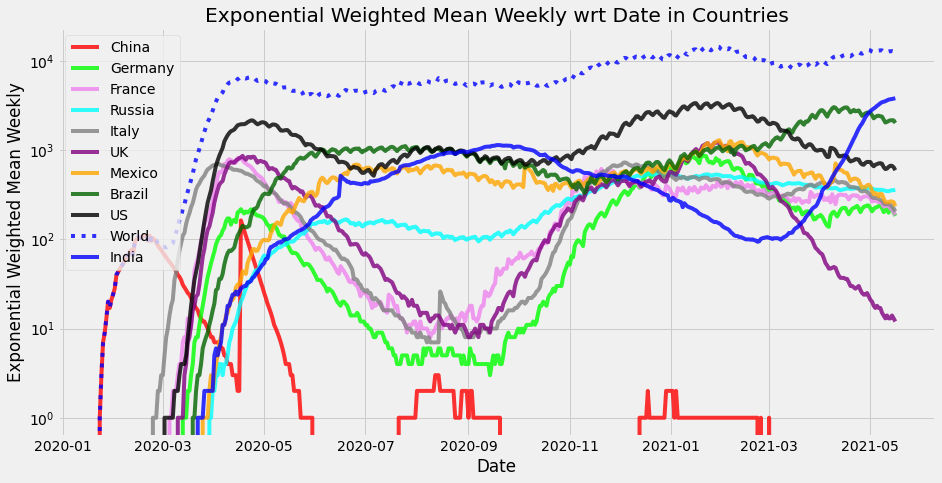

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

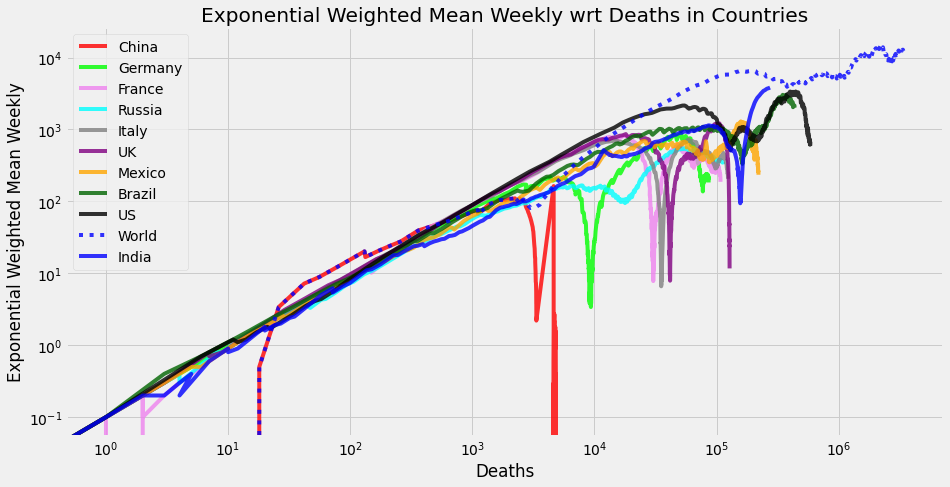

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

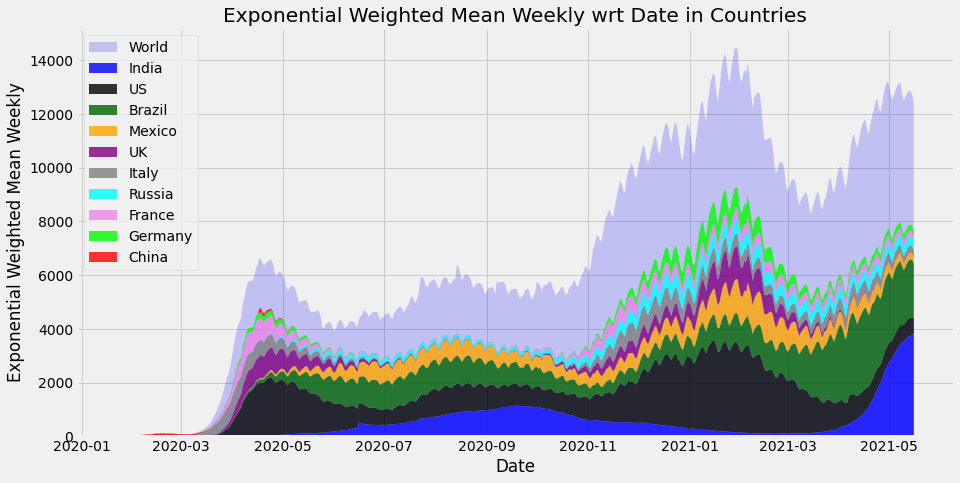

In [20]:
stackplotter(AVG, name)

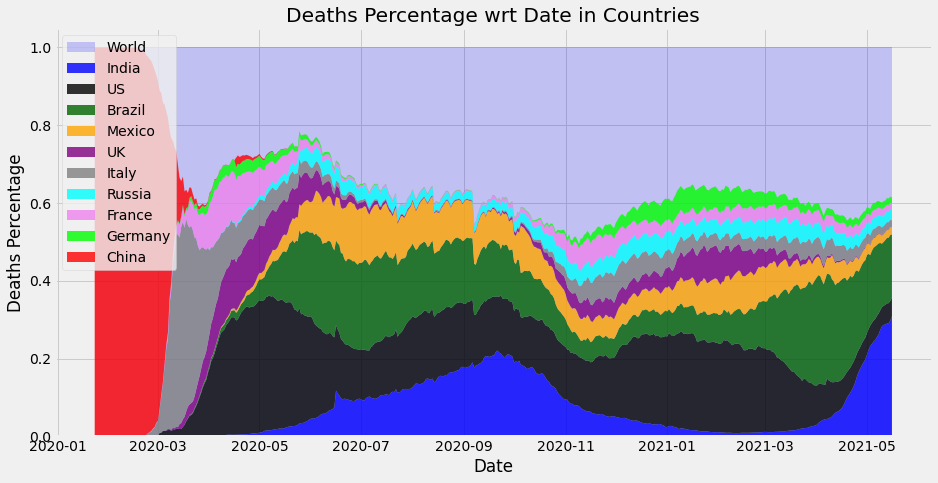

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

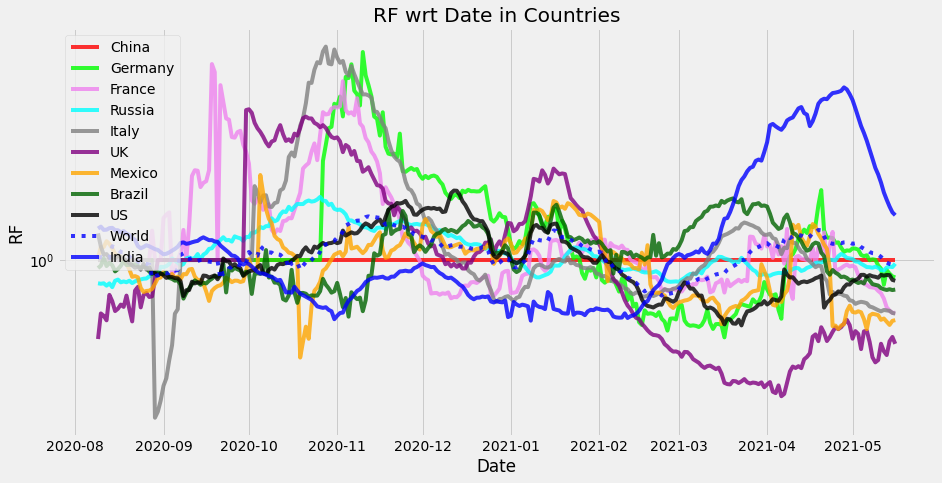

In [23]:
plotter(Reproductivity[200:], 'RF')

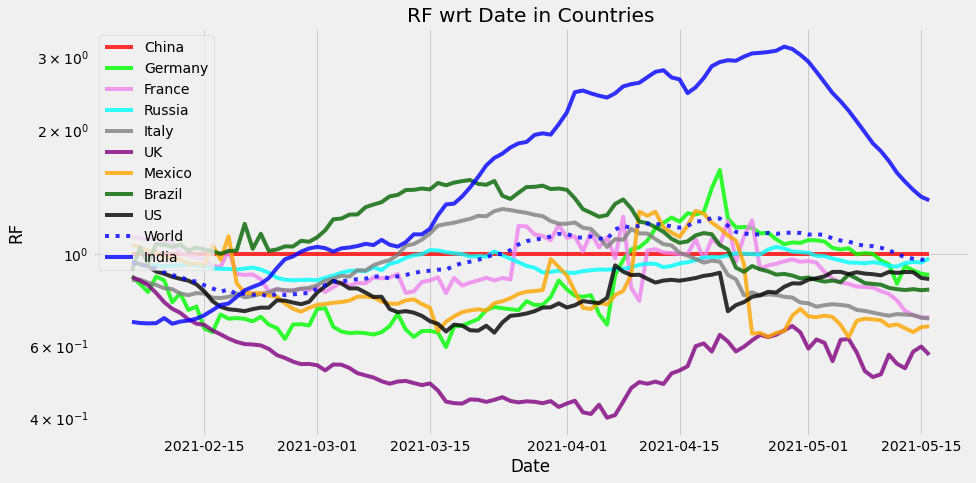

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

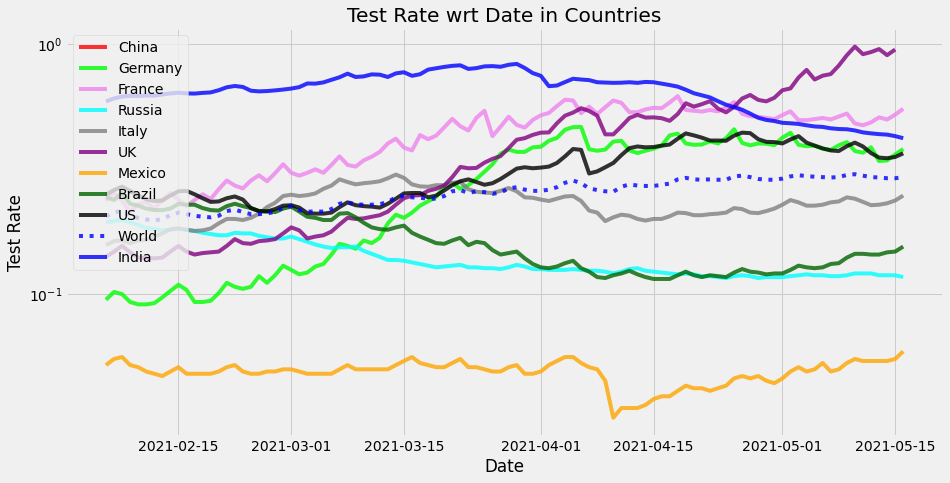

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

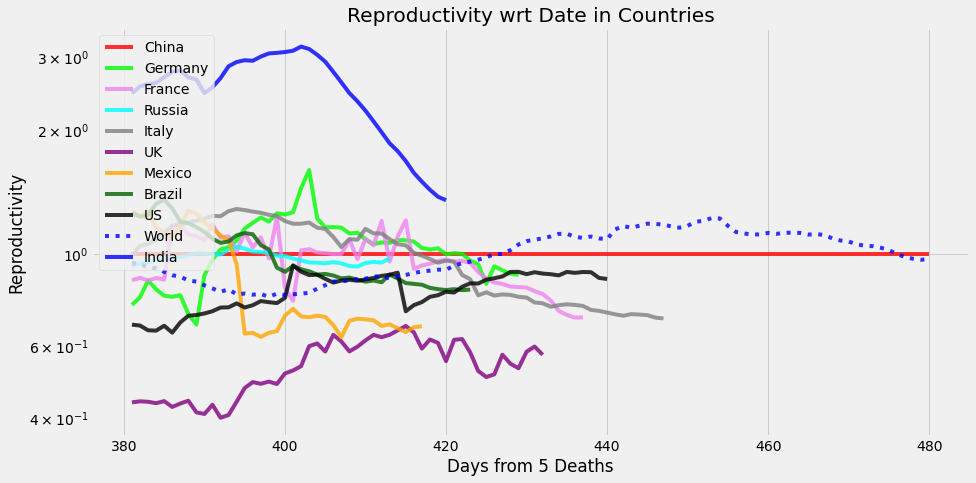

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

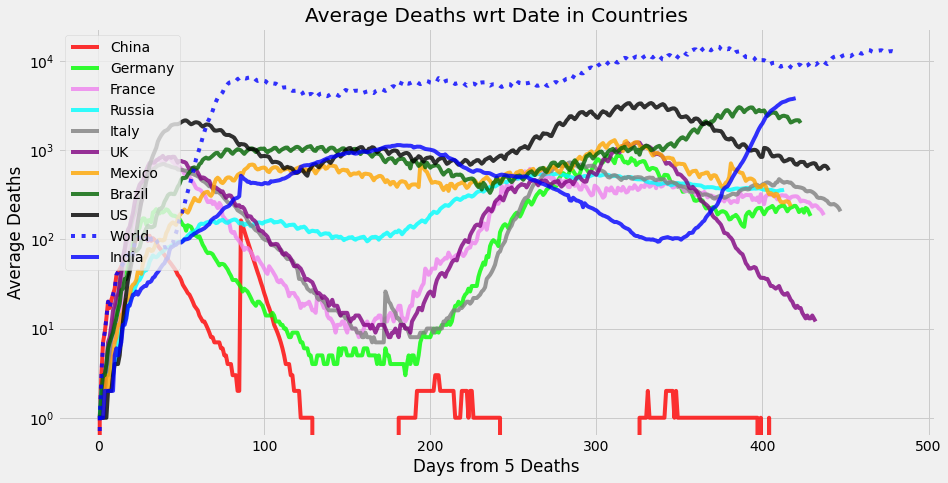

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

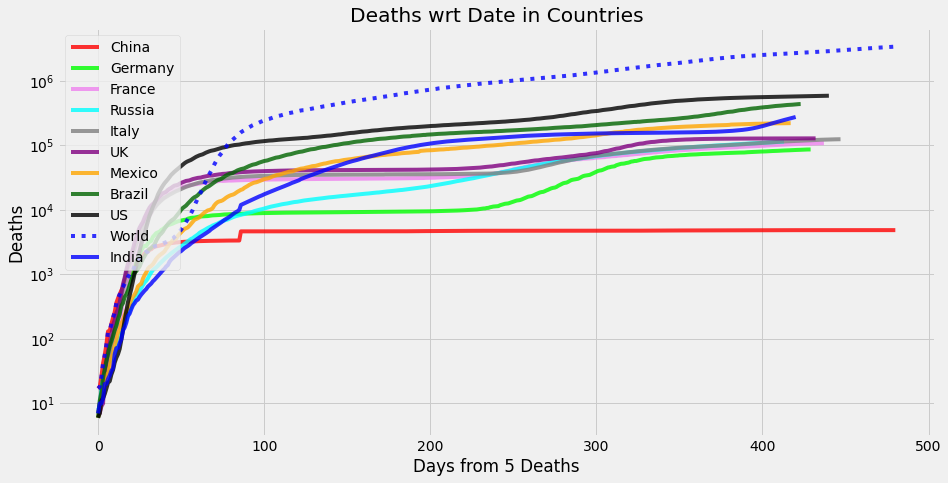

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3379349,10090,12331.43,12392.76,0.9731,163069932,0.294,728470,675.87
US,585970,262,588.00,595.68,0.8703,32940846,0.366,43605,117.19
Brazil,435751,1036,1915.86,2015.84,0.8205,15627243,0.155,62295,87.15
India,274390,4106,4039.14,3824.07,1.3499,24965463,0.421,321642,54.88
Mexico,220437,53,207.43,234.66,0.6688,2381923,0.059,2768,44.09
UK,127941,4,10.86,11.69,0.5705,4466589,NaN,2404,25.59
Italy,124156,93,189.00,206.44,0.6984,4159122,0.248,10245,24.83
Russia,113927,386,357.43,359.98,0.9761,4883734,0.117,8455,22.79
France,107777,81,174.86,187.11,0.7026,5939019,0.552,20663,21.56


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3379349,10090,12331.43,12392.76,0.9731,163069932,0.294,728470,675.87
India,274390,4106,4039.14,3824.07,1.3499,24965463,0.421,321642,54.88
Brazil,435751,1036,1915.86,2015.84,0.8205,15627243,0.155,62295,87.15
US,585970,262,588.00,595.68,0.8703,32940846,0.366,43605,117.19
Colombia,81300,520,492.29,480.60,1.1467,3118426,0.166,15926,16.26
Argentina,70522,269,456.71,415.38,1.3019,3307285,0.252,20929,14.10
Russia,113927,386,357.43,359.98,0.9761,4883734,0.117,8455,22.79
Peru,66220,612,302.43,328.46,0.9180,1889052,0.101,6658,13.24
Iran,76936,303,289.43,311.47,0.8114,2751166,0.264,16448,15.39


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3379349


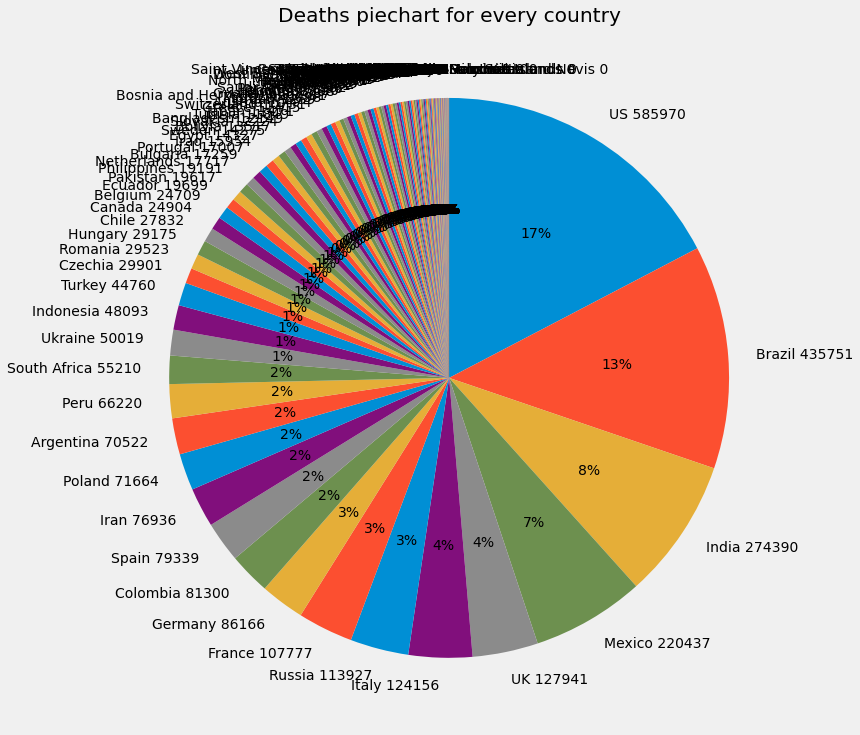

In [35]:
piechart('Deaths')

World total:  12331


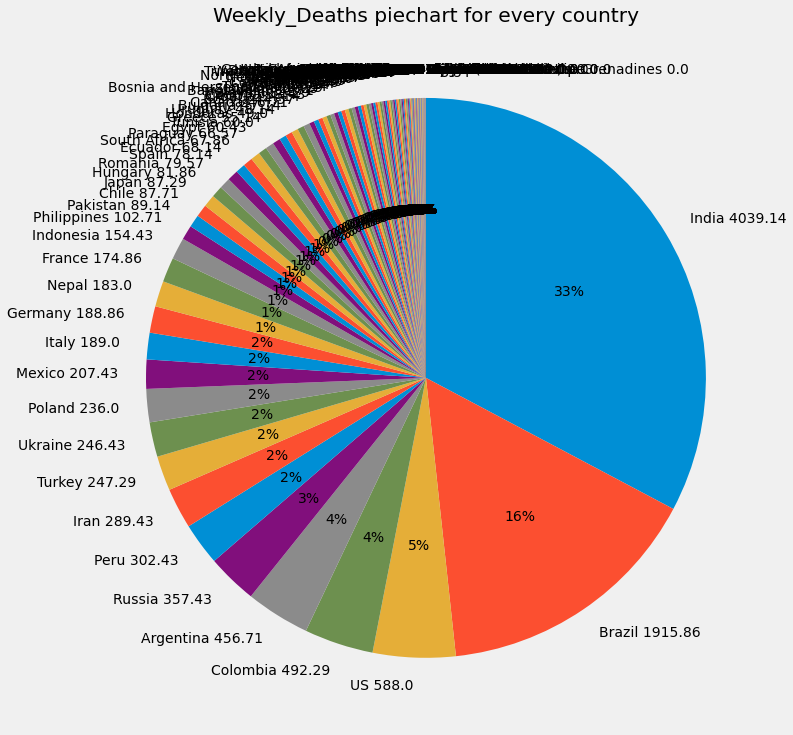

In [36]:
piechart('Weekly_Deaths')

World total:  10090


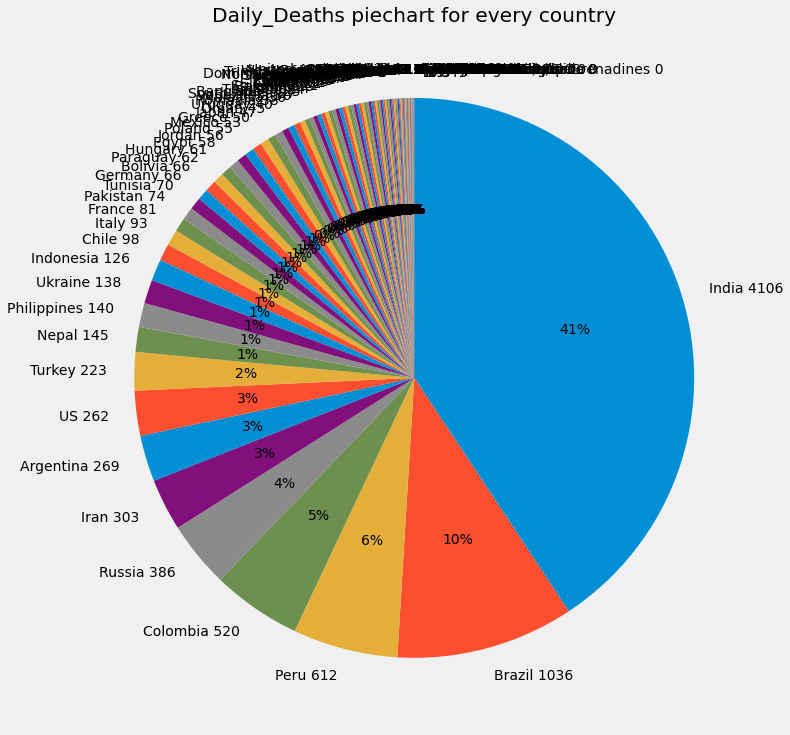

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-05-18


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

675869800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

[master 12faf3d] `date` update
 1 file changed, 1 insertion(+), 1 deletion(-)


To https://github.com/Arrowheadahp/COVID-19.git
   3e305ff..12faf3d  master -> master
